In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss
              
#parameters 
n = 2.7                                     #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
re = 2.6                                    #1kpc
L = 3.27e10                                 #luminosity

 #gamma function
f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations
bn = root

I0 = (L*(bn**(2*n)))/(((re**2)*2*np.pi*n)*ss.gamma(2*n)) 

r0 = re/bn**n

print(r0)                              #in kpc
print(bn)
print(I0)

 #inner function
f = lambda x,m: ((np.exp(-np.power(x/r0, (1/n))))*(np.power(x/r0, ((1/n)-1))))/(np.sqrt((x**2)-(m**2)));


0.032457790309459424
5.070574690730433
41024432058.25408


In [3]:
 #integrate inner function
g = lambda m: quad(f, m, np.inf,args=(m,))[0]
print(g(10))

4.2888694614208456e-06


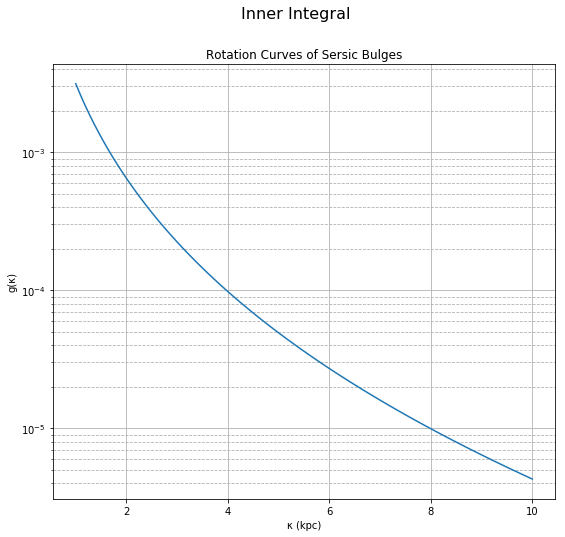

In [5]:
 #plotting inner integral
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #curves
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

#plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

#plt.legend(fontsize=14);                                      #adding legend

In [ ]:
#parameters 
#I0 = 4.1e10                                       #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                           #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                            #intrinsic axis ratio
i = 45*(np.pi/180)                                  #inclination angle

 #equations
C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)

 #plot range
x = np.linspace(0.001, 19, 200)

 #integrate outer function
h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

y = np.zeros(np.shape(x))

yr = lambda r: quad(h,0,r,args=(r,))[0]

for j,r in enumerate(x):
    y[j] = yr(r)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


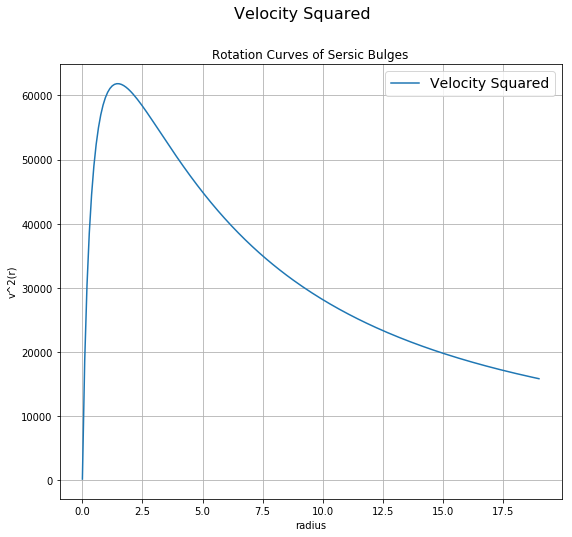

In [5]:
 #plotting velocity squared function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

#x = np.linspace(1, 10, 100)                    #x from/to and line smoothness
#lv = np.vectorize(l)

 #curves
#plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          
plt.plot(x, y, linestyle='solid', label='Velocity Squared')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

plt.legend(fontsize=14);                                   #adding legend
plt.show()

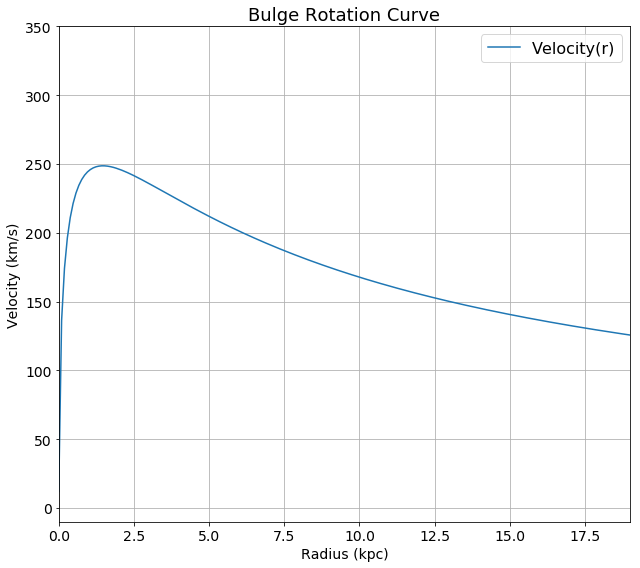

In [6]:
 #plotting bulge velocity curve

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

 #equation
v = np.sqrt(y)

 #curves
plt.plot(x, v, linestyle='solid', label='Velocity(r)')          

plt.axis([0, 19, -10, 350]);                         #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
#ax3.set_ylim(0,np.max(v)*1.3)
ax3.set_title('Bulge Rotation Curve', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Velocity (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.tight_layout()
plt.savefig('Plot1_n4.png')
plt.show()